In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import keras,os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
h = 300
w = 150
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( h, w,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

# model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


# opt = Adam(lr=0.005)
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [3]:
batch_size = 10

train_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])
test_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])


train_generator = train_datagen.flow_from_directory('croped/train', target_size=(h, w),batch_size=batch_size,color_mode="grayscale") 
validation_generator = test_datagen.flow_from_directory('croped/test',target_size=(h, w),batch_size=batch_size,color_mode="grayscale")

print(train_generator.samples)
print(validation_generator.samples)
print(train_generator.class_indices)

Found 1182 images belonging to 2 classes.
Found 389 images belonging to 2 classes.
1182
389
{'formal': 0, 'informal': 1}


In [4]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)


model.save('models/version8.h5')  # always save your weights after training or during trainin


/home/uchiha/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
118/118 [==============================] - 43s 357ms/step - loss: 3.6607 - accuracy: 0.5045 - val_loss: 0.6799 - val_accuracy: 0.5868
Epoch 2/50
118/118 [==============================] - 49s 415ms/step - loss: 0.6773 - accuracy: 0.5669 - val_loss: 0.6700 - val_accuracy: 0.5500
Epoch 3/50
118/118 [==============================] - 39s 331ms/step - loss: 0.6561 - accuracy: 0.6259 - val_loss: 0.6616 - val_accuracy: 0.6500
Epoch 4/50
118/118 [==============================] - 40s 336ms/step - loss: 0.6385 - accuracy: 0.6519 - val_loss: 0.6939 - val_accuracy: 0.5395
Epoch 5/50
118/118 [==============================] - 40s 337ms/step - loss: 0.6163 - accuracy: 0.6553 - val_loss: 0.6780 - val_accuracy: 0.5842
Epoch 6/50
118/118 [==============================] - 41s 349ms/step - loss: 0.6100 - accuracy: 0.6959 - val_loss: 0.6687 - val_accuracy: 0.5684
Epoch 7/50
118/118 [==============================] - 40s 340ms/step - loss: 0.6028 - accuracy: 0.6535 - val_loss: 0.6545 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


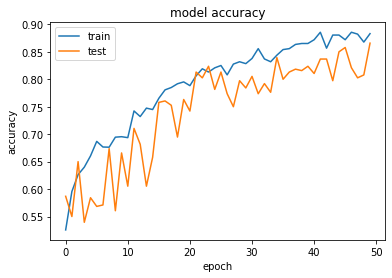

In [9]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

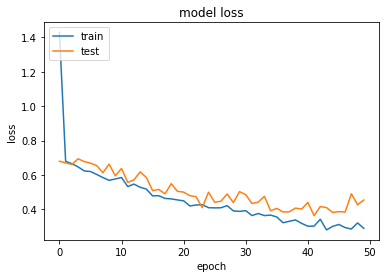

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()